### Large Dataset: Integrated Surface Dataset (Global)

**Dataset source:** https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00532/html

**S3 URL:** The data are stored on S3 in the bucket s3://noaa-isd-pds/ as fixed width text files (https://noaa-isd-pds.s3.amazonaws.com/index.html).

**Dataset description:** The Integrated Surface Dataset (**ISD**) is composed of worldwide surface weather observations from over 35,000 stations, though the best spatial coverage is evident in North America, Europe, Australia, and parts of Asia. Parameters included are: air quality, atmospheric pressure, atmospheric temperature/dew point, atmospheric winds, clouds, precipitation, ocean waves, tides and more. ISD refers to the data contained within the digital database as well as the format in which the hourly, synoptic (3-hourly), and daily weather observations are stored. The format conforms to Federal Information Processing Standards (FIPS). ISD provides hourly data that can be used in a wide range of climatological applications. For some stations, data may go as far back as 1901, though most data show a substantial increase in volume in the 1940s and again in the early 1970s. Currently, there are over 14,000 "active" stations updated daily in the database.

**Dataset Identifiers:** NCEI DSI 3505_03 

### Small Dataset: Integrated Surface Data - “Lite”
**Dataset description:** The ISD-Lite data contain a fixed-width formatted subset of the complete Integrated Surface Data (ISD) for a select number of observational elements. The data are typically stored in a single file corresponding to the ISD data, i.e. one file per station per year. 

ISD-Lite contains eight common hourly time-series climatological variables represented in a fixed-width format. The elements extracted are:
1. Air temperature (degrees Celsius * 10)
2. Dew point temperature (degrees Celsius * 10)
3. Sea level pressure (hectopascals)
4. Wind direction (angular degrees)
5. Wind speed (meters per second * 10)
6. Total cloud cover (coded, see format documentation)
7. One-hour accumulated liquid precipitation (millimeters)
8. Six-hour accumulated liquid precipitation (millimeters)
The ISD-Lite data are represented with a modified time stamp which corresponds to the nearest hour of actual observation. Sub-hourly observations were removed. Duplicate observations were resolved according to a ranking system.

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[(7.2, 46.3333333), (13.0333333, 48.2166666), (12.1833333, 47.2333333), (13.6666666, 46.6), (1.333, 51.35), (35.948681, 35.401094), (6.5666666, 46.7333333), (0.95, 21.333), (-52.8, 68.717), (-107.0166666, 49.1), (170.9333333, 70.0833333), (9.5666666, 47.4833333), (91.4666666, 46.1166666), (153.979119, 24.289697), (31.933, -13.267), (31.933, -13.267), (8.6, 46.3166666), (72.35, 34.817), (-76.867, -0.083), (170.597006, 69.783283), (-179.1166666, 66.35), (167.85, 63.2), (163.0166666, 60.7333333), (28.7, 54.8833333), (28.9833333, 53.8333333), (27.221689, 31.325356), (30.35, 30.4), (33.645517, 28.209028), (-64.031389, 67.545833), (-87.6833333, 56.0166666), (-122.054167, 52.183056), (-108.522778, 54.125278), (-105.8333333, 59.25), (-105.964567, 28.702875), (-94.65, 53.85), (-113.8166666, 49.1333333), (-113.6, 53.3), (-80.0333333, 45.3333333), (-70.1166666, 48.2666666), (-77.25, 45.8666666), (-53.5833333, 49.1166666), (-110.3, 24.1666666), (-104.528014, 24.124194), (-89.65, 21.3), (-97.460839

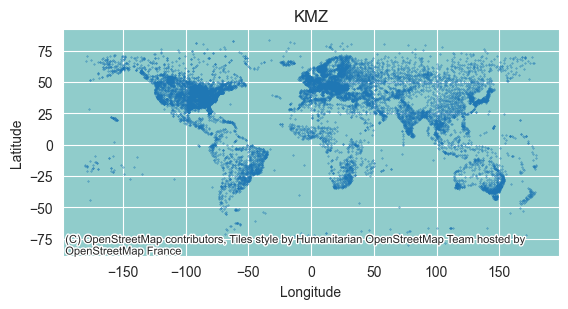

In [2]:
'''STEP.1: Global Weather Stations Visualization'''
import zipfile
import os
from xml.dom import minidom
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

def read_kmz_file(kmz_filepath):
    # Temporary directory to store the extracted KML file
    temp_dir = "temp_kml"
    with zipfile.ZipFile(kmz_filepath, 'r') as kmz:
        kmz.extractall(temp_dir)

    # Find the extracted KML file
    kml_file = None
    for root, dirs, files in os.walk(temp_dir):
        for file in files:
            if file.endswith('.kml'):
                kml_file = os.path.join(root, file)
                break

    if kml_file is None:
        raise ValueError("No KML file found in KMZ archive.")

    # Read the KML file and return its content
    with open(kml_file, 'r') as f:
        kml_content = f.read()
    return kml_content


def extract_coordinates(kml_content):
    # Parse the KML file content using the minidom parser
    dom = minidom.parseString(kml_content)

    # Extract coordinate data
    coordinates = []
    for placemark in dom.getElementsByTagName('Placemark'):
        for coord in placemark.getElementsByTagName('coordinates'):
            coord_string = coord.firstChild.nodeValue
            coord_list = coord_string.split(',')
            longitude, latitude = map(float, coord_list[:2])
            coordinates.append((longitude, latitude))
    return coordinates


def visualize_coordinates(coordinates):
    # Create an empty GeoDataFrame
    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy([coord[0] for coord in coordinates], [coord[1] for coord in coordinates]))
    # Plot the GeoDataFrame
    ax = gdf.plot(markersize=0.1)
    # Add a background map
    ctx.add_basemap(ax, zoom=12)
    # Set the plot
    ax.set_title('KMZ')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    # Show the plot
    plt.show()


# Path of the KMZ file
kmz_filepath = '/Users/a1234/Downloads/isd.kmz'

# Read the KMZ file and extract data
kml_content = read_kmz_file(kmz_filepath)
print(f"Finished reading {len(kml_content)} KML files")
print(kml_content)  # Print the KML file content

# Save the kml_content variable as a txt file
txt_filepath = 'kml_content.txt'  # Replace with the desired path to save the txt file

with open(txt_filepath, 'w') as f:
    f.write(kml_content)

print(f"KML content saved as txt file: {txt_filepath}")

# Extract coordinate data
coordinates = extract_coordinates(kml_content)
print(coordinates)

# Visualize coordinate data
visualize_coordinates(coordinates)


In [2]:
'''STEP.2: Country and Area Codes in the Dataset'''
# Specify the path to your file
file_path = '/Users/a1234/Desktop/workspace/UAV3.0/GDAL/noaa/country-list.txt'

# Open the file and read its contents
with open(file_path, 'r') as file:
    content = file.read()

# Print the content
print(content)

FIPS ID     COUNTRY NAME

AA          ARUBA                                                                           
AC          ANTIGUA AND BARBUDA                                                             
AF          AFGHANISTAN                                                                     
AG          ALGERIA                                                                         
AI          ASCENSION ISLAND                                                                
AJ          AZERBAIJAN                                                                      
AL          ALBANIA                                                                         
AM          ARMENIA                                                                         
AN          ANDORRA                                                                         
AO          ANGOLA                                                                          
AQ          AMERICAN SAMOA                  

Site location data download:https://www.ncei.noaa.gov/maps/alltimes/

In [21]:
'''STEP.3: Acquisition and Formatting of Small DataSet'''
import os
import csv
import gzip
import json
from ftplib import FTP

def read_station_ids(file_path):
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        station_ids = [row[0] for row in reader]
        station_ids = [id[:6] for id in station_ids]
        print(station_ids)
        return station_ids

def download_isd_lite_data(ftp, station_id, year, output_dir):
    file_name = f'{station_id}-99999-{year}.gz'
    remote_path = f'/pub/data/noaa/isd-lite/{year}/{file_name}'
    local_path = os.path.join(output_dir, file_name)

    try:
        with open(local_path, 'wb') as f:
            ftp.retrbinary(f'RETR {remote_path}', f.write)

        if os.path.getsize(local_path) == 0:
            print(f"No data available for {file_name}")
            os.remove(local_path)
        else:
            print(f'Downloaded {file_name}')
            # Convert to JSON and save to the json directory
            json_dir = os.path.join(output_dir, 'json')  # Path to JSON directory
            convert_gz_to_json(local_path, json_dir)
    except Exception as e:
        print(f'Error downloading {file_name}: {e}')


def convert_gz_to_json(gz_path, json_dir):
    # Ensure JSON directory exists
    if not os.path.exists(json_dir):
        os.makedirs(json_dir)

    # Build the path to the JSON file
    json_filename = os.path.splitext(os.path.basename(gz_path))[0] + '.json'
    json_path = os.path.join(json_dir, json_filename)

    # Read the .gz file and convert the content to JSON format
    with gzip.open(gz_path, 'rt') as gz_file:  # 'rt' mode means reading text data
        data = gz_file.read()  # Assuming the file content can be loaded into memory at once
        json_data = parse_gz_data_to_json(data)  # Parsing function

        # Save JSON data to a file
        with open(json_path, 'w') as json_file:
            json.dump(json_data, json_file, indent=4)

    print(f'Converted {os.path.basename(gz_path)} to JSON and stored in {json_dir}')


def parse_gz_data_to_json(data):
    json_data = []
    lines = data.splitlines()
    for line in lines:
        values = line.split()
        if len(values) == 12:  # Ensure each line of data has 12 values
            entry = {
                "Year": int(values[0]),
                "Month": int(values[1]),
                "Day": int(values[2]),
                "Hour": int(values[3]),
                "Temperature": int(values[4]),
                "Td": int(values[5]),
                "Pressure": int(values[6]),
                "WindDirection": int(values[7]),
                "WindSpeed": int(values[8]),
                "CloudCover": int(values[9]),
                "Rain1h": int(values[10]),
                "Rain6h": int(values[11]),
            }
            json_data.append(entry)
    return json_data


def download_contry_isd_lite_data(stations_file, start_year, end_year, output_dir):
    ftp = FTP('ftp.ncdc.noaa.gov')
    ftp.login()

    station_ids = read_station_ids(stations_file)

    for station_id in station_ids:
        for year in range(start_year, end_year + 1):
            download_isd_lite_data(ftp, station_id, year, output_dir)

    ftp.quit()

def combine_json_files(json_dir, combined_json_dir):
    os.makedirs(combined_json_dir, exist_ok=True)

    json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

    # Group files and sort them according to rules
    file_groups = {}
    for json_file in json_files:
        prefix = '-'.join(json_file.split('-')[:2])
        if prefix not in file_groups:
            file_groups[prefix] = []
        file_groups[prefix].append(json_file)

    # Sort files by year and combine
    for prefix, files in file_groups.items():
        sorted_files = sorted(files, key=lambda x: int(x.split('-')[2].split('.')[0]))

        combined_data = []
        for file_name in sorted_files:
            with open(os.path.join(json_dir, file_name), 'r') as f:
                data = json.load(f)
                combined_data.extend(data)

        start_year1 = sorted_files[0].split('-')[2].split('.')[0]
        end_year1 = sorted_files[-1].split('-')[2].split('.')[0]

        combined_file_name = f"{prefix}-{start_year1}-{end_year1}.json"
        with open(os.path.join(combined_json_dir, combined_file_name), 'w') as f:
            json.dump(combined_data, f, indent=4)

        print(f"Combined files into {combined_file_name}")

if __name__ == '__main__':
    stations_file = 'jp.csv'
    # US：United States
    # JP：Japan
    # CN：China
    # CA：Canada
    # UK：United Kingdom
    # VM: Vietnam
    # SN: Singapore 
    # Massachusetts: Massachusetts in US
    start_year = 2014
    end_year = 2024
    base_directory = '/Users/a1234/Desktop/workspace/UAV3.0/GDAL/noaa_data'
    folder_name = f"{start_year}_{end_year}_{os.path.splitext(stations_file)[0]}"
    folder_path = os.path.join(base_directory, folder_name)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    output_dir = folder_path

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    download_contry_isd_lite_data(stations_file, start_year, end_year, output_dir)

    # file path to combine JSON
    combined_json_dir = os.path.join(output_dir, 'conjson')
    # combine JSON
    combine_json_files(os.path.join(output_dir, 'json'), combined_json_dir)

    print('------------------Download Over-----------------')

['999999', '744915', '744915', '725067', '744900', '744900', '725088', '725088', '999999', '997273', '994971', '725057', '725067', '725069', '725069', '744910', '744907', '997279', '725107', '999999', '725107', '744905', '725090', '725099', '725075', '725075', '725059', '725059', '999999', '725059', '725059', '744904', '744904', '725094', '722256', '725066', '725066', '999999', '725076', '725063', '725063', '725060', '725061', '725097', '725065', '725065', '725098', '725098', '725085', '725085', '725061', '725060', '744916', '744104', '744916', '744104', '999999', '725064', '725064', '726068', '726069', '999999', '999999', '725068', '725068', '998014', '999999', '744910', '999999', '725100', '725095']
Error downloading 999999-99999-2014.gz: 550 /pub/data/noaa/isd-lite/2014/999999-99999-2014.gz: No such file or directory
Error downloading 999999-99999-2015.gz: 550 /pub/data/noaa/isd-lite/2015/999999-99999-2015.gz: No such file or directory
Error downloading 999999-99999-2016.gz: 550 /pu

## STEP.4 Data Cleaning
**Data Cleaning Function (`clean_isd_lite_data`)**:
   - Iterates through JSON records and extracts relevant data such as year, month, day, hour, temperature, dew point temperature, pressure, wind direction, wind speed, cloud cover, rain 1-hour, and rain 6-hour.
   - Scales temperature, dew point temperature, pressure, rain 1-hour, and rain 6-hour values and handles missing values.

In [22]:
'''STEP.4 Data Cleaning'''
import os
import json
import numpy as np

# Define data cleaning function
def clean_isd_lite_data(json_data):
    cleaned_data = []

    for record in json_data:
        cleaned_record = {}
        cleaned_record['Year'] = record['Year']
        cleaned_record['Month'] = record['Month']
        cleaned_record['Day'] = record['Day']
        cleaned_record['Hour'] = record['Hour']

        # Temperature, Dew Point Temperature, and Sea Level Pressure: Scale and handle missing values
        cleaned_record['Temperature'] = record['Temperature'] / 10.0 if record['Temperature'] != -9999 else np.nan
        cleaned_record['DewPointTemperature'] = record['Td'] / 10.0 if record['Td'] != -9999 else np.nan
        cleaned_record['Pressure'] = record['Pressure'] / 10.0 if record['Pressure'] != -9999 else np.nan

        # Wind Direction and Speed: Handle missing values
        cleaned_record['WindDirection'] = record['WindDirection'] if record['WindDirection'] != -9999 else np.nan
        cleaned_record['WindSpeed'] = record['WindSpeed'] / 10.0 if record['WindSpeed'] != -9999 else np.nan

        # Cloud Cover: Handle missing values
        cleaned_record['CloudCover'] = record['CloudCover'] if record['CloudCover'] != -9999 else np.nan

        # Precipitation: Scale and handle missing and trace values
        cleaned_record['Rain1h'] = record['Rain1h'] / 10.0 if record['Rain1h'] not in [-9999, -1] else (0 if record['Rain1h'] == -1 else np.nan)
        cleaned_record['Rain6h'] = record['Rain6h'] / 10.0 if record['Rain6h'] not in [-9999, -1] else (0 if record['Rain6h'] == -1 else np.nan)

        cleaned_data.append(cleaned_record)

    return cleaned_data

def read_and_clean_json_files(base_directory):
    # Construct the path to the conjson directory
    conjson_dir = os.path.join(base_directory, 'conjson')
    
    # Iterate through all JSON files in the conjson directory
    for filename in os.listdir(conjson_dir):
        if filename.endswith('.json'):
            file_path = os.path.join(conjson_dir, filename)
            
            # Read JSON data
            with open(file_path, 'r') as file:
                json_data = json.load(file)
            
            # Clean the data
            cleaned_data = clean_isd_lite_data(json_data)
            
            print(f"Processed {filename}")
            # Save the cleaned data as a new JSON file
            cleaned_file_path = os.path.join(conjson_dir, f"cleaned_{filename}")
            with open(cleaned_file_path, 'w') as cleaned_file:
                json.dump(cleaned_data, cleaned_file, indent=4)

if __name__ == '__main__':
    # Specify the base_directory path
    base_directory = '/Users/a1234/Desktop/workspace/UAV3.0/GDAL/noaa_data/2014_2024_jp'
    read_and_clean_json_files(base_directory)


Processed 994971-99999-2014-2024.json
Processed 998014-99999-2014-2024.json
Processed 997273-99999-2014-2024.json
Processed 997279-99999-2014-2024.json


## STEP.5
从指定的目录加载所有以cleaned_开头的JSON文件，将它们的内容合并到一个pandas DataFrame中。接下来对数据做了基本的统计分析，例如计算各变量的描述性统计量（如均值、中位数、标准差等），并检查变量之间的相关性。最后通过可视化查看数据的分布情况。

In [33]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_cleaned_data(conjson_dir):
    # Load all cleaned data into a DataFrame
    all_data = []
    for filename in os.listdir(conjson_dir):
        if filename.startswith('cleaned_') and filename.endswith('.json'):
            file_path = os.path.join(conjson_dir, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                all_data.extend(data)
    return pd.DataFrame(all_data)

def plot_histograms(data, variables, n_rows, n_cols, figsize=(20, 10)):
    # Plot histograms
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    for var, ax in zip(variables, axes.flatten()):
        sns.histplot(data[var].dropna(), bins=30, kde=True, ax=ax)
        ax.set_title(var)
    plt.tight_layout()
    plt.show()

def plot_time_series(data, variable, title):
    # Plot time series
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data[variable], marker='o', linestyle='-', markersize=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_data(data):
    # Print descriptive statistics
    print("Descriptive Statistics:")
    print(data.describe())
    
    # Compute and print correlation matrix
    print("\nCorrelation Matrix:")
    print(data.corr())

if __name__ == '__main__':
    # Specify the directory where cleaned data is located
    conjson_dir = '/Users/a1234/Desktop/workspace/UAV3.0/GDAL/noaa_data/2014_2024_jp/conjson'  
    data = load_cleaned_data(conjson_dir)
    
    # Add a date column to the data for time series analysis
    data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])
    
    # Analyze the data
    analyze_data(data)
    
    # Visualize variable histograms
    variables = ['Temperature', 'DewPointTemperature', 'Pressure', 'WindSpeed', 'CloudCover', 'Rain1h', 'Rain6h']
    plot_histograms(data, variables, n_rows=3, n_cols=3)
    
    # Plot time series, using temperature as an example
    plot_time_series(data, 'Temperature', 'Temperature Over Time')


KeyboardInterrupt: 

## STEP.6 输入坐标，寻找最近站带

In [35]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

# Load data from CSV
def load_site_data(filepath):
    df = pd.read_csv(filepath)
    # Ensure latitude, longitude, and elevation are float
    df['LATITUDE'] = df['LATITUDE'].astype(float)
    df['LONGITUDE'] = df['LONGITUDE'].astype(float)
    df['ELEVATION'] = df['ELEVATION'].astype(float)
    return df

# Function to calculate three-dimensional distance
def calculate_3d_distance(lat1, lon1, ele1, lat2, lon2, ele2):
    # Calculate horizontal distance (in kilometers)
    horizontal_distance = geodesic((lat1, lon1), (lat2, lon2)).kilometers
    # Calculate elevation difference (in meters)
    elevation_diff = ele2 - ele1
    # Convert elevation difference from meters to kilometers
    elevation_diff_km = elevation_diff / 1000
    # Calculate three-dimensional distance
    distance_3d = np.sqrt(horizontal_distance**2 + elevation_diff_km**2)
    return distance_3d

# Find the nearest sites based on 3D distance
def find_nearest_sites(df, target_location, target_elevation, top_n=5):
    # Calculate 3D distances to all sites
    df['THREE_DIMENSIONAL_DISTANCE'] = df.apply(
        lambda row: calculate_3d_distance(
            target_location[0], target_location[1], target_elevation,
            row['LATITUDE'], row['LONGITUDE'], row['ELEVATION']
        ), axis=1
    )
    # Sort by 3D distance and select the top_n sites
    nearest_sites = df.sort_values('THREE_DIMENSIONAL_DISTANCE').head(top_n)
    return nearest_sites[['STATION_ID', 'STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'THREE_DIMENSIONAL_DISTANCE']]

# Load site data
df_sites = load_site_data('/Users/a1234/Desktop/workspace/UAV3.0/GDAL/jp.csv')

# Target location (latitude, longitude) and elevation (in meters)
target_location = (35.6895, 139.6917)  # Tokyo's latitude and longitude
target_elevation = 40.0  # Assumed elevation for Tokyo in meters

# Find the nearest sites
nearest_sites_df = find_nearest_sites(df_sites, target_location, target_elevation)

# Convert nearest site IDs to a list of strings with the first five characters
nearest_ids = [str(id)[:5] for id in nearest_sites_df['STATION_ID'].tolist()]
print(nearest_ids)


['47671', '47999', '47662', '47683', '47687']


## STEP.7 训练LSTM模型（data frame）

Epoch 1/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 469us/step - loss: 0.2289 - val_loss: 0.1129
Epoch 2/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - loss: 0.1091 - val_loss: 0.1000
Epoch 3/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - loss: 0.1020 - val_loss: 0.0983
Epoch 4/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - loss: 0.0983 - val_loss: 0.0945
Epoch 5/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 0.0958 - val_loss: 0.0925
Epoch 6/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - loss: 0.0935 - val_loss: 0.0905
Epoch 7/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - loss: 0.0931 - val_loss: 0.0898
Epoch 8/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - loss: 0.0906 - val_loss: 0.0885
Epoch 9/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - loss: 0.0896 - val_loss: 0.0880
Epoch 10/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - loss: 0.0903 - val_loss: 0.0875
Epoch 11/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - loss: 0.0881 - val_loss: 0.0866
Epoch 12

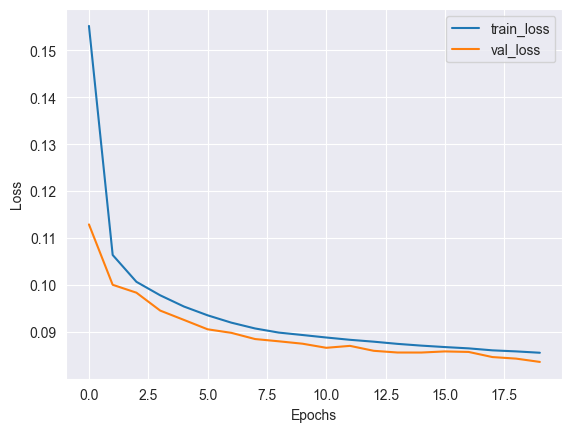

1038/1038 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


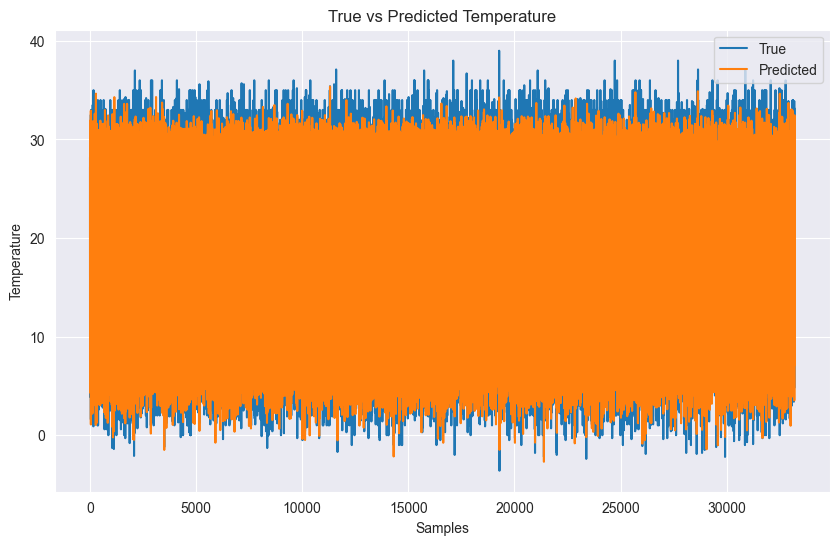

Mean Squared Error (MSE): 5.819528763588241
Mean Absolute Error (MAE): 1.8389540486006422
R^2 Score: 0.9157928079549206
Total runtime: 30.671900987625122 seconds


In [36]:
import os
import json
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time

# Function to prepare data
def prepare_data(conjson_dir, target_column, site_ids):
    all_data = []
    # Iterate through files in the directory
    for filename in os.listdir(conjson_dir):
        # Ensure filename starts with "cleaned_" and contains any of the specified site IDs
        if filename.startswith('cleaned_') and any(str(site_id) in filename for site_id in site_ids):
            file_path = os.path.join(conjson_dir, filename)
            # Load data from JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)
                all_data.extend(data)
                
    # Convert data to DataFrame
    df = pd.DataFrame(all_data)
    # Handle infinite and missing values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=[target_column], inplace=True)

    # Handle missing values in columns
    for column in df.columns:
        if df[column].isnull().any():
            if df[column].dtype in ['float64', 'int64'] and df[column].notna().any():
                # Fill missing values with mean
                df.loc[:, column] = df.loc[:, column].fillna(df[column].mean())
            else:
                # Drop columns with missing values
                df.drop(column, axis=1, inplace=True)
    
    if df.empty:
        raise ValueError("No data left after cleaning. Check your data and cleaning process.")

    return df

# Function to build the LSTM model
def build_model(input_shape):
    model = Sequential()
    # Add input layer
    model.add(Input(shape=input_shape))
    # Add LSTM layer
    model.add(LSTM(50, activation='tanh'))
    # Add output layer
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    return model

if __name__ == '__main__':
    # Set the base directory
    base_directory = '/Users/a1234/Desktop/workspace/UAV3.0/GDAL/noaa_data/2014_2024_jp/conjson'
    # Define the target column
    target_column = 'Temperature'
    # Record the start time
    start_time = time.time()
    # Prepare data
    df = prepare_data(base_directory, target_column, nearest_ids)

    # Separate feature columns and target column
    feature_columns = [col for col in df.columns if col != target_column]
    X = df[feature_columns].values
    y = df[target_column].values

    # Standardize the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the LSTM model
    model = build_model((1, X_train.shape[2]))
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'Model Test Loss: {loss}')

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Visualize predicted results
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test = scaler_y.inverse_transform(y_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Temperature')
    plt.title('True vs Predicted Temperature')
    plt.legend()
    plt.show()

    # Calculate additional evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')

    # Record the end time
    end_time = time.time()
    # Calculate and print the runtime
    runtime = end_time - start_time
    print("=======================================================")
    print(f"Total runtime: {runtime} seconds")
    print("=======================================================")


24/03/20 19:10:23 WARN TaskSetManager: Stage 229 contains a task of very large size (1025 KiB). The maximum recommended task size is 1000 KiB.
24/03/20 19:10:24 WARN TaskSetManager: Stage 230 contains a task of very large size (1025 KiB). The maximum recommended task size is 1000 KiB.


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 459us/step - loss: nan - val_loss: nan
Epoch 2/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - loss: nan - val_loss: nan
Epoch 3/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: nan - val_loss: nan
Epoch 4/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step - loss: nan - val_loss: nan
Epoch 5/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 458us/step - loss: nan - val_loss: nan
Epoch 6/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - loss: nan - val_loss: nan
Epoch 7/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 450us/step - loss: nan - val_loss: nan
Epoch 8/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 2s 451us/step - loss: nan - val_loss: nan
Epoch 9/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - loss: nan - val_loss: nan
Epoch 10/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - loss: nan - val_loss: nan
Epoch 11/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - loss: nan - val_loss: nan
Epoch 12/20
3320/3320 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - loss: nan - val_loss: nan


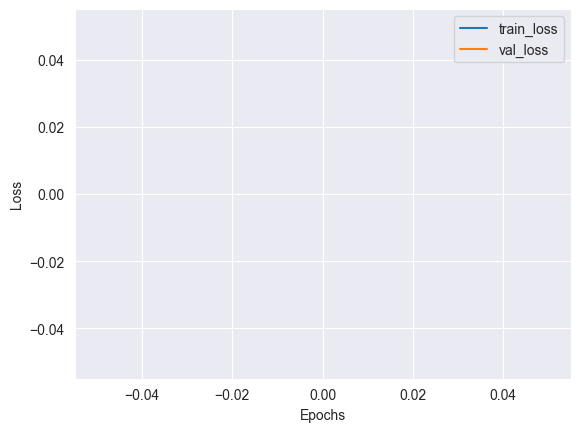

1038/1038 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step


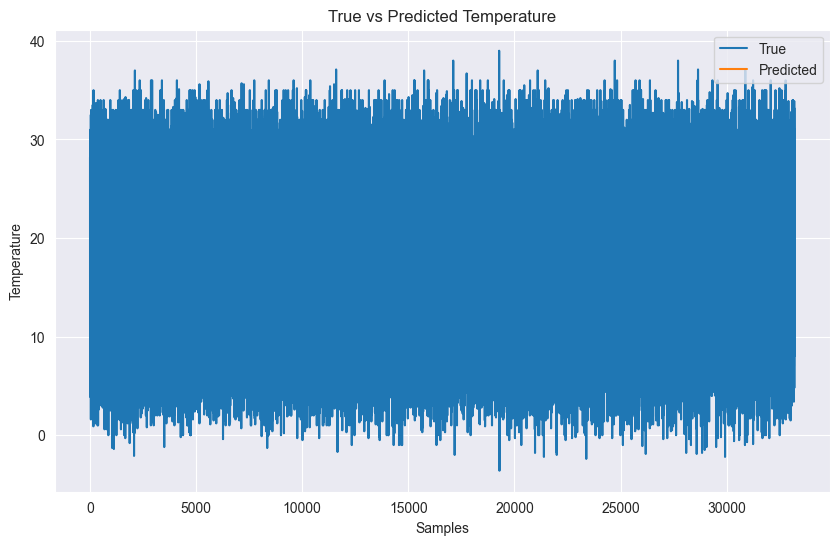

ValueError: Input contains NaN.

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, when
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt
import time
import os
import json

def prepare_data(spark, conjson_dir, target_column, site_ids):
    all_data = []
    for filename in os.listdir(conjson_dir):
        if filename.startswith('cleaned_') and any(str(site_id) in filename for site_id in site_ids):
            file_path = os.path.join(conjson_dir, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                all_data.extend(data)

    if not all_data:
        raise ValueError("No data found.")

    # Create a generic schema with all fields as StringType
    schema = StructType([StructField(field, StringType(), nullable=True) for field in all_data[0].keys()])

    # Create DataFrame
    df = spark.createDataFrame(all_data, schema=schema)

    # Convert columns to appropriate data types
    for field in df.schema.fields:
        column_name = field.name
        if column_name == target_column:
            df = df.withColumn(column_name, col(column_name).cast(FloatType()))
        else:
            df = df.withColumn(column_name, when(col(column_name).isNull(), None).otherwise(col(column_name).cast(FloatType())))

    # Drop rows with missing target values
    df = df.na.drop(subset=[target_column])
    
    return df

def build_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='tanh'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

if __name__ == "__main__":
    # Initialize Spark session
    spark = SparkSession.builder \
        .appName("TemperaturePredictionWithSpark") \
        .getOrCreate()

    # Set directory and target column
    base_directory = '/Users/a1234/Desktop/workspace/UAV3.0/GDAL/noaa_data/2014_2024_jp/conjson'
    target_column = 'Temperature'
    #nearest_ids = [1, 2, 3]  # Example nearest_ids list

    # Record the start time
    start_time = time.time()

    # Prepare data
    df = prepare_data(spark, base_directory, target_column, nearest_ids)

    # Separate feature columns and target column
    feature_columns = [col for col in df.columns if col != target_column]
    X = df.select(feature_columns).toPandas().values
    y = df.select(target_column).toPandas().values

    # Standardize the data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the LSTM model
    model = build_model((1, X_train.shape[2]))
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'Model Test Loss: {loss}')

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Visualize predicted results
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test = scaler_y.inverse_transform(y_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Temperature')
    plt.title('True vs Predicted Temperature')
    plt.legend()
    plt.show()

    # Calculate additional evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')

    # Record the end time
    end_time = time.time()
    # Calculate and print the runtime
    runtime = end_time - start_time
    print("=======================================================")
    print(f"Total runtime: {runtime} seconds")
    print("=======================================================")

    # Stop Spark session
    spark.stop()


In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt
import time
import os
import json

def prepare_data(spark, conjson_dir, target_column, site_ids):
    # Load data using partitioning to leverage parallelism
    df = spark.read.json(conjson_dir)
    df = df.repartition("site_id")  # Repartition data based on site_id for parallel processing

    # Filter data based on site_ids
    df = df.filter(col("site_id").isin(site_ids))

    # Convert columns to appropriate data types
    df = df.withColumn(target_column, col(target_column).cast(FloatType()))
    for field in df.schema.fields:
        if field.name != target_column:
            df = df.withColumn(field.name, when(col(field.name).isNull(), None).otherwise(col(field.name).cast(FloatType())))

    # Drop rows with missing target values
    df = df.na.drop(subset=[target_column])

    return df

def build_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

if __name__ == "__main__":
    spark = SparkSession.builder \
        .appName("TemperaturePredictionWithSpark") \
        .getOrCreate()

    base_directory = '/Users/a1234/Desktop/workspace/UAV3.0/GDAL/noaa_data/2014_2024_jp/conjson'
    target_column = 'Temperature'

    start_time = time.time()

    df = prepare_data(spark, base_directory, target_column, nearest_ids)

    feature_columns = [col for col in df.columns if col != target_column]
    X = df.select(feature_columns).toPandas().values
    y = df.select(target_column).toPandas().values

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = build_model((1, X_train.shape[2]))

    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'Model Test Loss: {loss}')

    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test = scaler_y.inverse_transform(y_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Temperature')
    plt.title('True vs Predicted Temperature')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')

    end_time = time.time()
    runtime = end_time - start_time
    print("=======================================================")
    print(f"Total runtime: {runtime} seconds")
    print("=======================================================")

    spark.stop()


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `site_id` cannot be resolved. Did you mean one of the following? [`_corrupt_record`].;
'RepartitionByExpression ['site_id]
+- Relation [_corrupt_record#1460] json
